In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from rdkit import Chem
from rdkit import DataStructs
from rdkit.ML.Cluster import Butina
from rdkit.Chem import Draw, rdFingerprintGenerator
from rdkit.Chem import rdFMCS

In [2]:
smiles_df = pd.read_csv("cluster_x_0515_y_-30-39.csv")
smiles_df = smiles_df.loc[smiles_df["target_seq_label_1"].notna()].reset_index(drop=True)
smiles_df

,SMILES,x,y,num_atoms,pca_components,smiles,target_seq_label_0,target_seq_label_1
0,C[C@H]1CC[C@H](Cn2c(N3CCOC[C@H]3c3ccccc3)nc3cc...,0.994178,-3.737984,43,0,C[C@H]1CC[C@H](Cn2c(N3CCOC[C@H]3c3ccccc3)nc3cc...,['MEALMARGALTGPLRALCLLGCLLSHAAAAPSPIIKFPGDVAPK...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...
1,COc1ccc(CC(=O)O)cc1-c1cc2c(n1C(C)C)C(c1ccc(Cl)...,0.947667,-3.653722,40,0,COc1ccc(CC(=O)O)cc1-c1cc2c(n1C(C)C)C(c1ccc(Cl)...,['MAPLCPSPWLPLLIPAPAPGLTVQLLLSLLLLVPVHPQRLPRMQ...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...
2,COc1ccc(C#N)cc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1)...,0.995698,-3.689250,37,0,COc1ccc(C#N)cc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1)...,['MRLLLALLGVLLSVPGPPVLSLEASEEVELEPCLAPSLEQQEQE...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...
3,C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...,0.938458,-3.677047,36,0,C[C@]1(CC(=O)O)C[C@H](c2cccc(Cl)c2)[C@@H](c2cc...,['MAQTQGTRRKVCYYYDGDVGNYYYGQGHPMKPHRIRMTHNLLLN...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...
4,CC[C@@H](CS(=O)(=O)C(C)(C)C)N1C(=O)[C@@](C)(Cc...,0.974929,-3.638394,39,0,CC[C@@H](CS(=O)(=O)C(C)(C)C)N1C(=O)[C@@](C)(Cc...,['MSSQSHPDGLSGRDQPVELLNPARVNHMPSTVDVATALPLQVAP...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...
...,...,...,...,...,...,...,...,...
1893,COc1ccc(CO)cc1-c1cc2c(n1C(C)C)C(c1ccc(Cl)cc1C)...,0.960118,-3.656014,38,0,COc1ccc(CO)cc1-c1cc2c(n1C(C)C)C(c1ccc(Cl)cc1C)...,['MPPRPSSGELWGIHLMPPRILVECLLPNGMIVTLECLREATLIT...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...
1894,CC[C@@H](CS(=O)(=O)C(C)(C)C)N1C(=O)[C@@](C)(CC...,0.962426,-3.651155,44,0,CC[C@@H](CS(=O)(=O)C(C)(C)C)N1C(=O)[C@@](C)(CC...,['MTFNSFEGSKTCVPADINKEEEFVEEFNRLKTFANFPSGSPVSA...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...
1895,COc1ccncc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1C)N(c1...,0.994570,-3.684807,36,0,COc1ccncc1-n1nc2c(c1C(C)C)C(c1ccc(Cl)cc1C)N(c1...,['MRARPRPRPLWATVLALGALAGVGVGGPNICTTRGVSSCQQCLA...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...
1896,COc1ncccc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1C)N(c1...,0.996883,-3.689901,36,0,COc1ncccc1-c1nc2c(n1C(C)C)C(c1ccc(Cl)cc1C)N(c1...,['MMDVNSSGRPDLYGHLRSFLLPEVGRGLPDLSPDGGADPVAGSW...,['MCNTNMSVPTDGAVTTSQIPASEQETLVRPKPLLLKLLKSVGAQ...


In [3]:
compounds = []

for _, smiles in smiles_df["SMILES"].items():
    compounds.append(Chem.MolFromSmiles(smiles))

In [4]:
rdkitGen = rdFingerprintGenerator.GetMorganGenerator(radius=2, fpSize=1024)
fingerprints = [rdkitGen.GetFingerprint(mol) for mol in compounds]

print(f"Number of compounds converted: {len(fingerprints)}")
print(f"Fingerprint length per compound: {len(fingerprints[0])}")

Number of compounds converted: 1898
Fingerprint length per compound: 1024


In [5]:
def tanimotoDistanceMatrix(fpList):
    dissimilarityMatrix = []
    for i in range (1, len(fpList)):
        similarities = DataStructs.BulkTanimotoSimilarity(fpList[i], fpList[:i])
        dissimilarityMatrix.extend([1 - x for x in similarities])
    return dissimilarityMatrix

In [6]:
def clusterFingerprints(fingerprints, cutoff):
    distanceMatrix = tanimotoDistanceMatrix(fingerprints)
    clusters = Butina.ClusterData(distanceMatrix, len(fingerprints), cutoff, isDistData = True)
    clusters = sorted(clusters, key = len, reverse = True)
    return clusters

In [7]:
cutoff = 0.3
clusters = clusterFingerprints(fingerprints, cutoff)

In [8]:
numClustG1 = sum(1 for c in clusters if len(c) == 1)
numClustG5 = sum(1 for c in clusters if len(c) > 5)
numClustG25 = sum(1 for c in clusters if len(c) > 25)
numClustG100 = sum(1 for c in clusters if len(c) > 100)

print("total # clusters: ", len(clusters))
print("# clusters with only 1 compound: ", numClustG1)
print("# clusters with >5 compounds: ", numClustG5)
print("# clusters with >25 compounds: ", numClustG25)
print("# clusters with >100 compounds: ", numClustG100)

total # clusters:  336
# clusters with only 1 compound:  149
# clusters with >5 compounds:  72
# clusters with >25 compounds:  15
# clusters with >100 compounds:  3


In [9]:
smiles_df["cluster"] = np.nan
for indice in range(len(clusters)):
   for registro in clusters[indice]:
       smiles_df.loc[registro, "cluster"] = indice

smiles_df = smiles_df[smiles_df["SMILES"].notna()]
smiles_df = smiles_df.sort_values(by=["cluster"], ascending=True).reset_index(drop=True)
smiles_df_2 = smiles_df[["SMILES", "cluster"]]

In [10]:
original_coords = smiles_df[["SMILES", "x", "y"]]
result_df = pd.merge(smiles_df_2, original_coords, on="SMILES", how="left")
result_df

,SMILES,cluster,x,y
0,CCC(CC(C)(C)C#N)N1C(=O)[C@@](C)(CC(=O)O)C[C@H]...,0.0,0.937651,-3.683225
1,CC[C@@H](CCC(C)(O)C(F)(F)F)N1C(=O)[C@@](C)(CC(...,0.0,0.939932,-3.679969
2,CC[C@@H](CN1C[C@H]2C[C@@H]1CO2)N1C(=O)[C@@](C)...,0.0,0.938157,-3.681476
3,CCS(=O)(=O)C[C@H](C1CC1)N1C(=O)[C@@](C)(CC(=O)...,0.0,0.937265,-3.687752
4,CC[C@@H](CN1CCOC(C)(C)C1)N1C(=O)[C@@](C)(CC(=O...,0.0,0.936782,-3.683486
...,...,...,...,...
1893,COc1cc(C(=O)N(C)[C@@H](Cc2c[nH]c3ccccc23)C(=O)...,331.0,0.961184,-3.640193
1894,COc1ccccc1-n1nc2c(c1C(C)C)C(CC(=O)N1CCOCC1)(c1...,332.0,0.988291,-3.631324
1895,COC(=O)[C@H](Cc1ccc(O)cc1)NC(=O)CC(c1ccccc1)(c...,333.0,1.002894,-3.630024
1896,C[C@@H](NC1=C(C(=O)c2ccccc2)C(c2ccc(Br)cc2)N(C...,334.0,0.970217,-3.597156


/tmp/ipykernel_19092/332511025.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


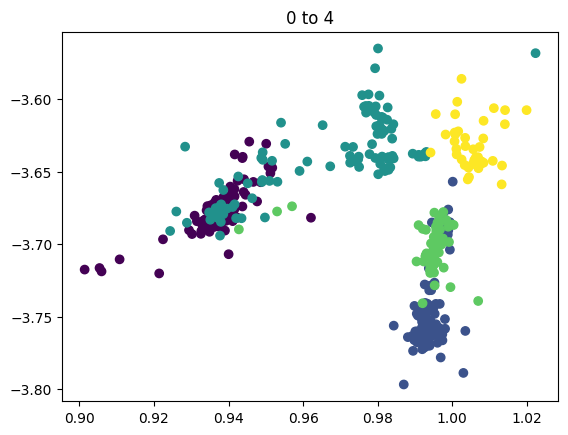

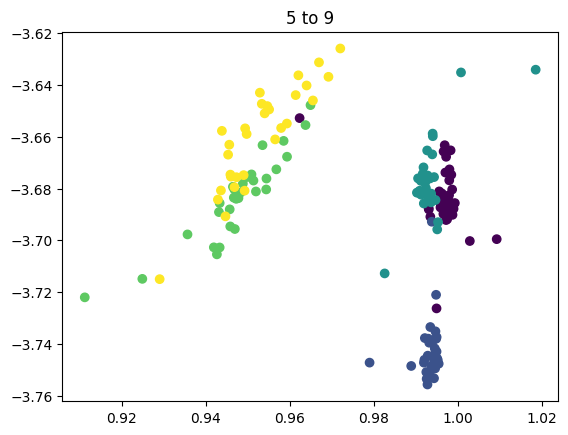

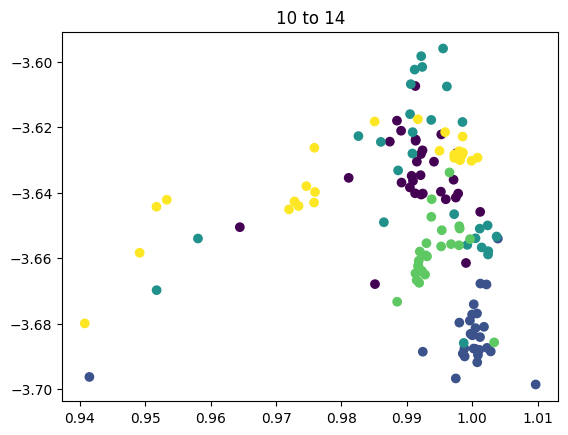

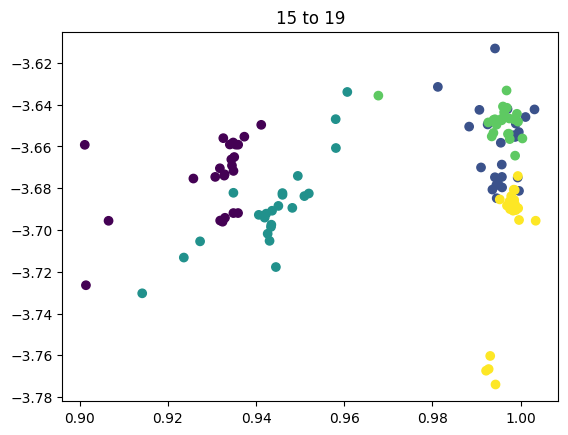

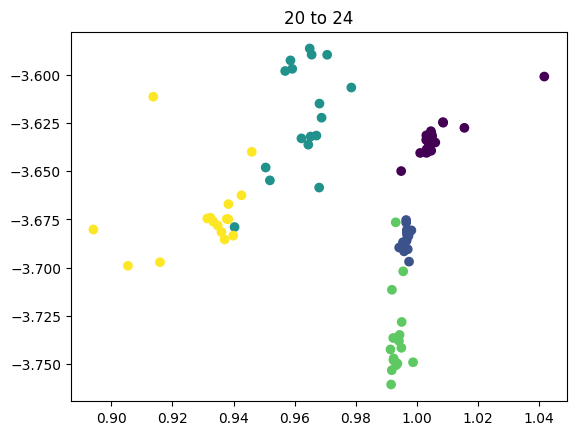

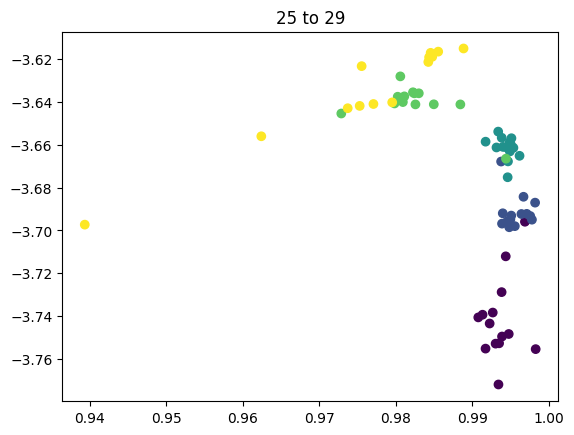

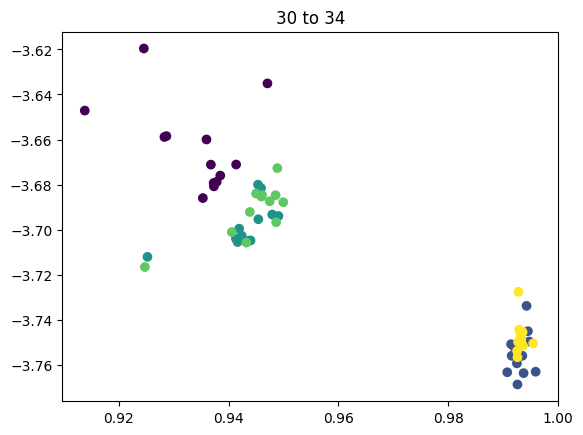

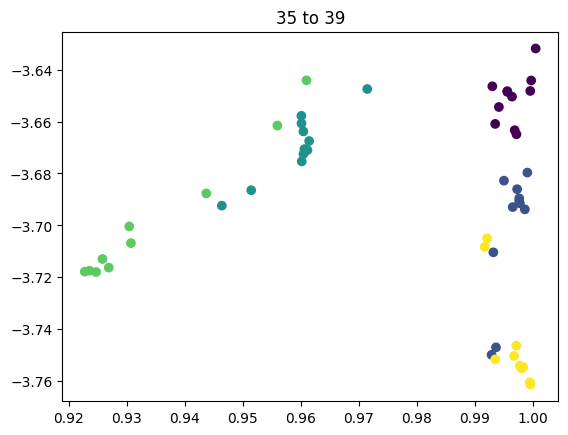

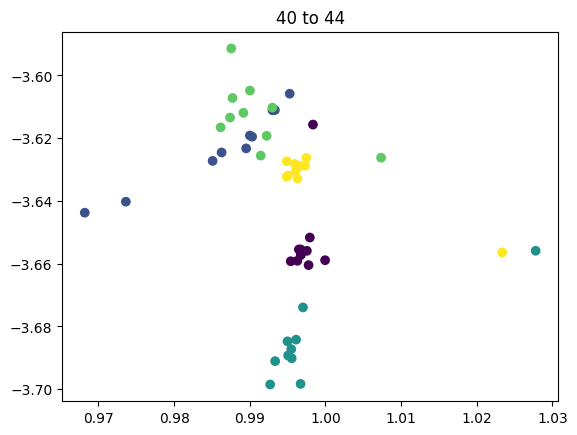

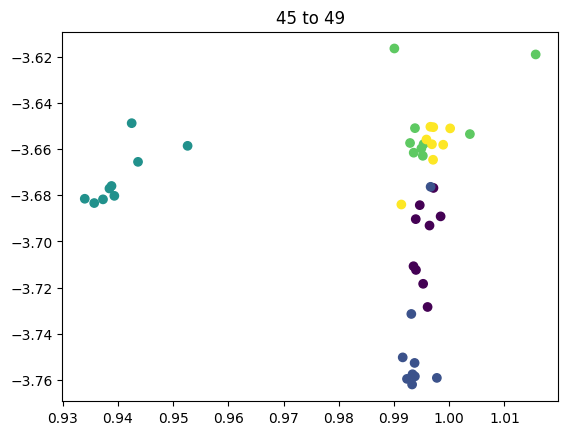

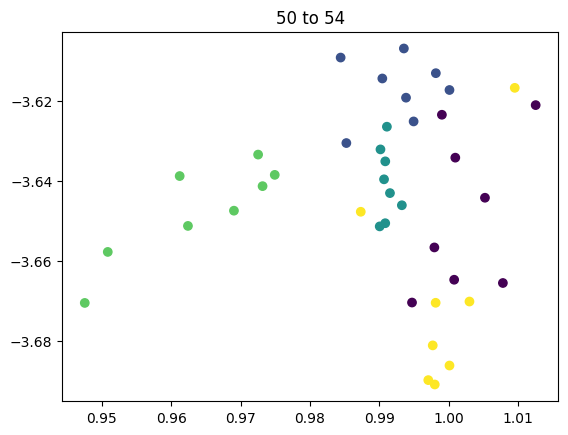

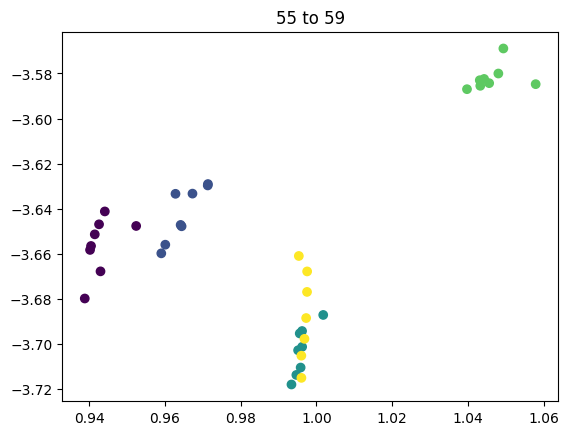

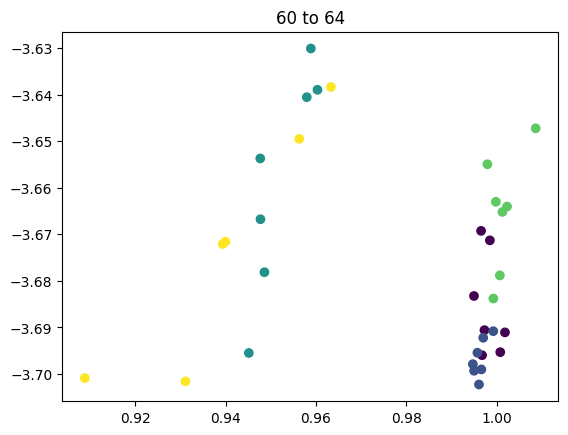

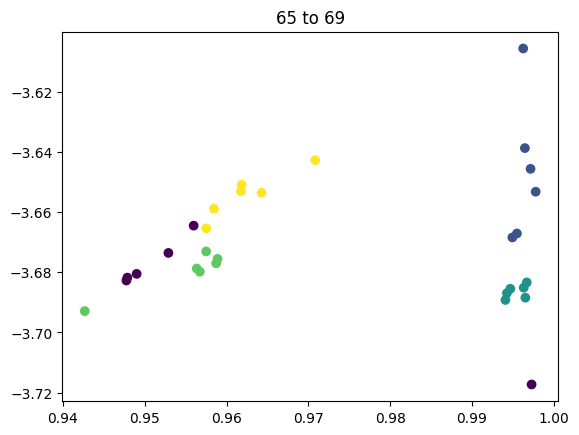

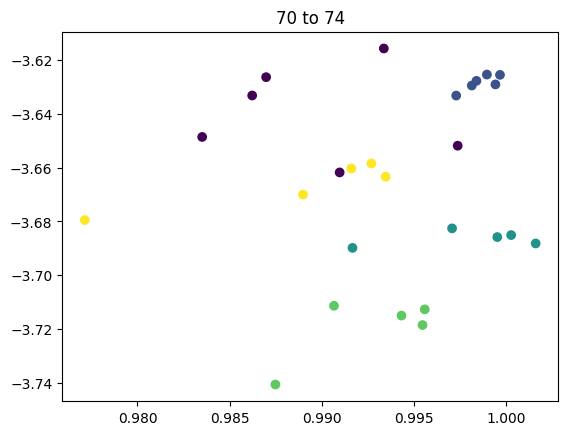

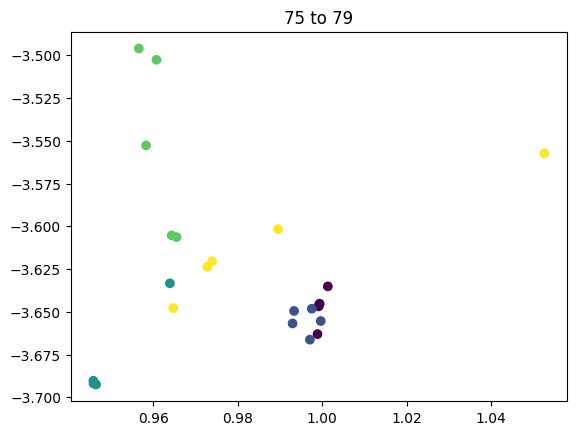

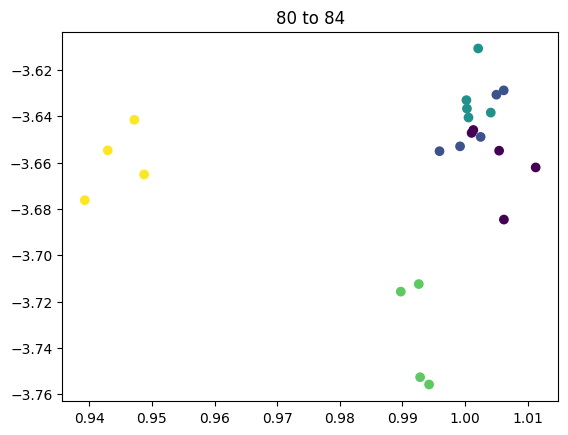

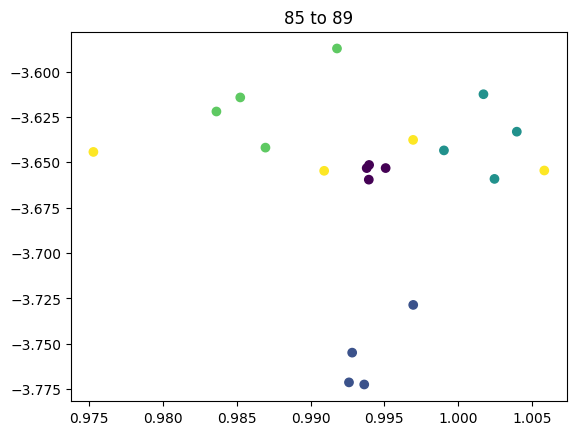

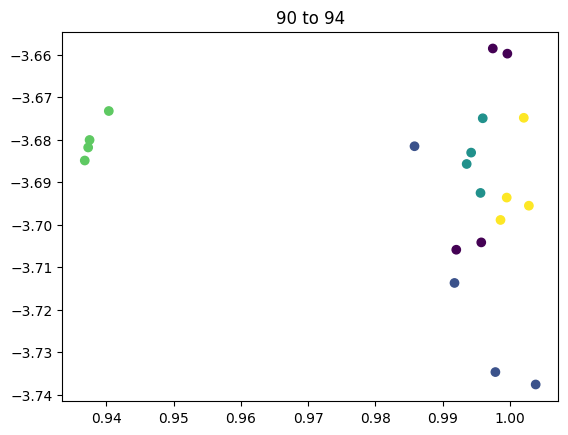

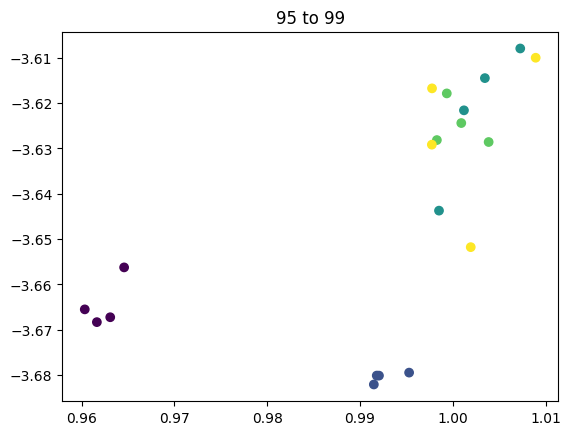

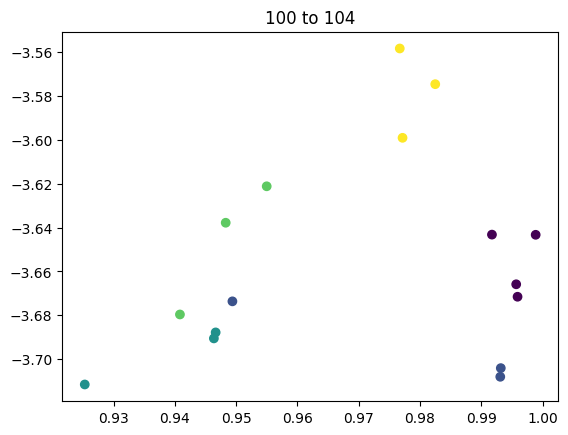

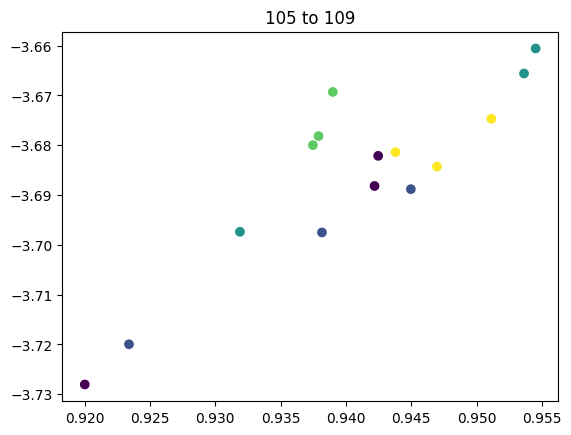

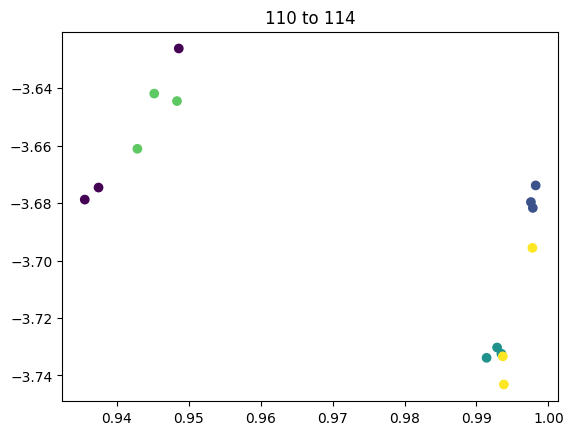

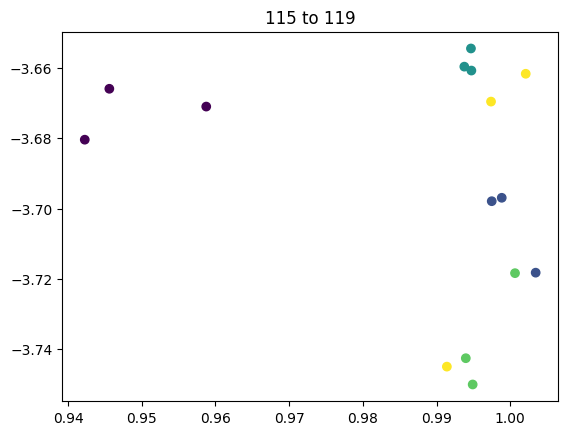

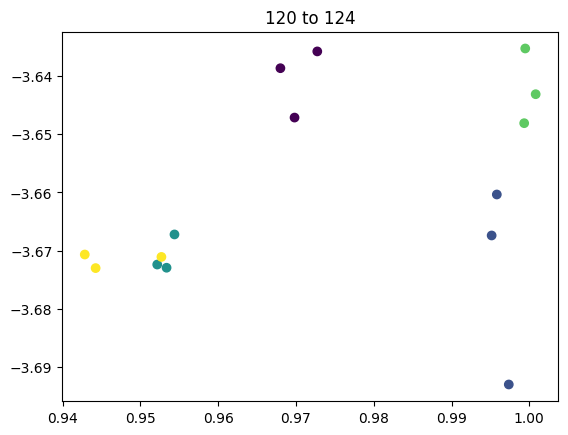

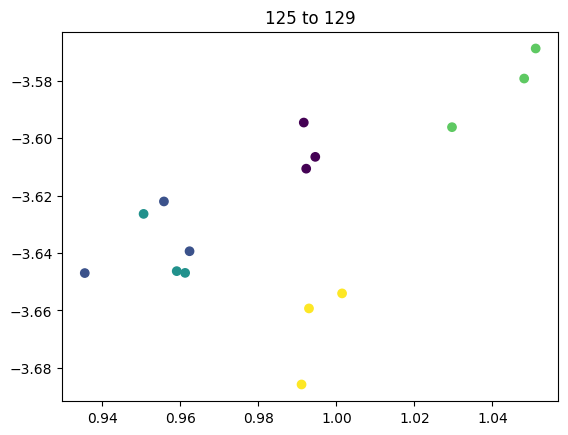

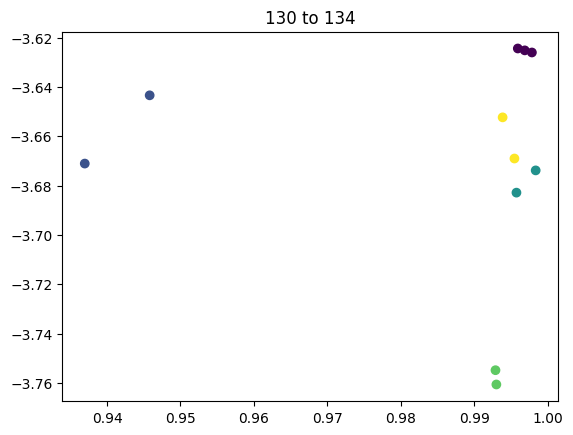

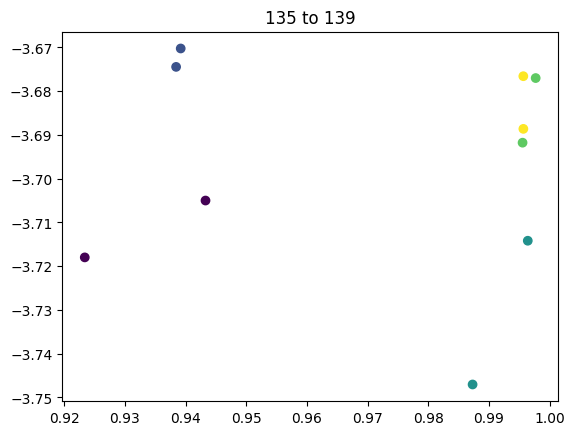

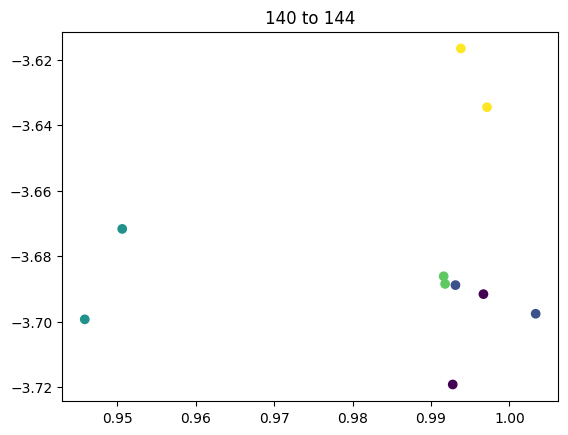

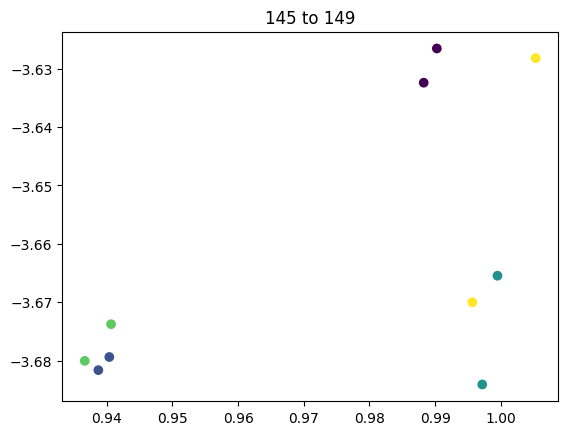

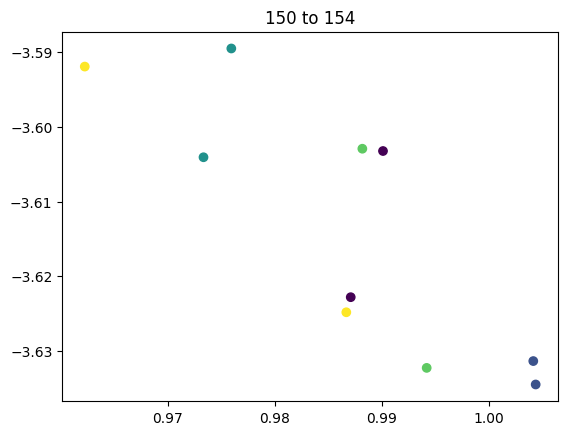

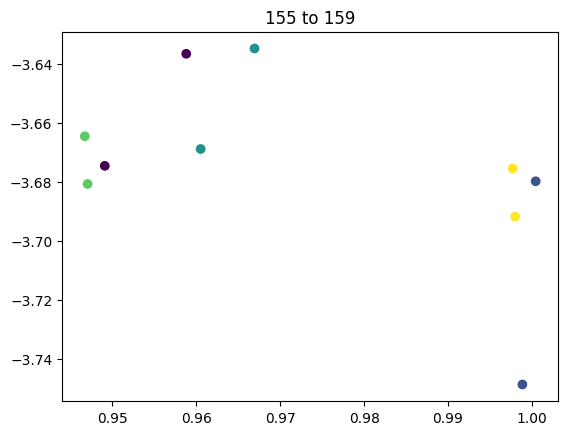

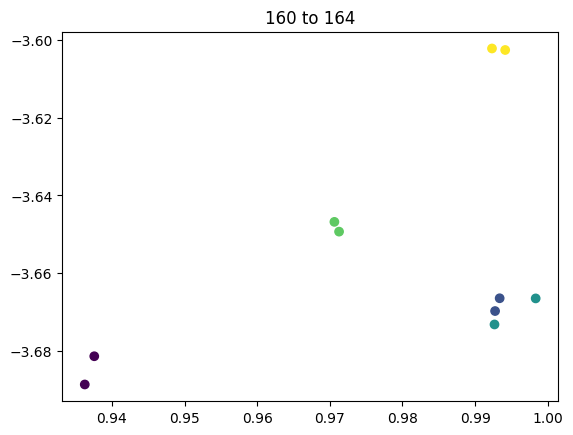

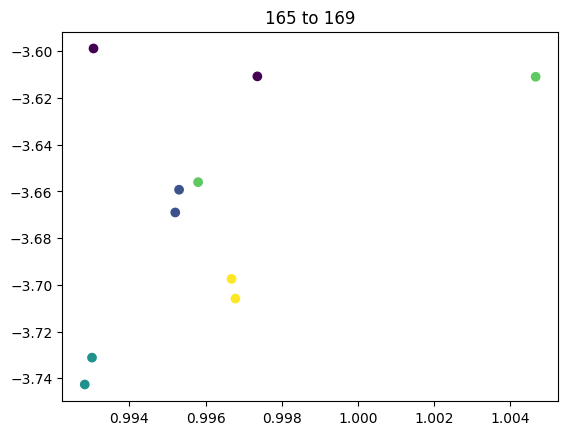

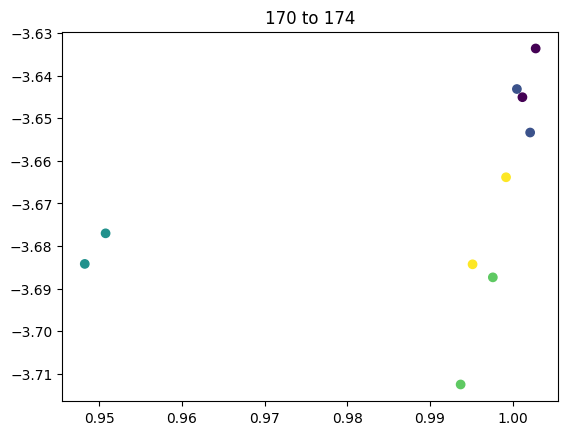

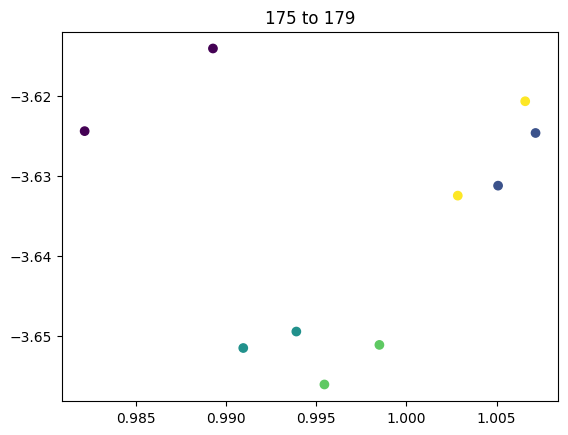

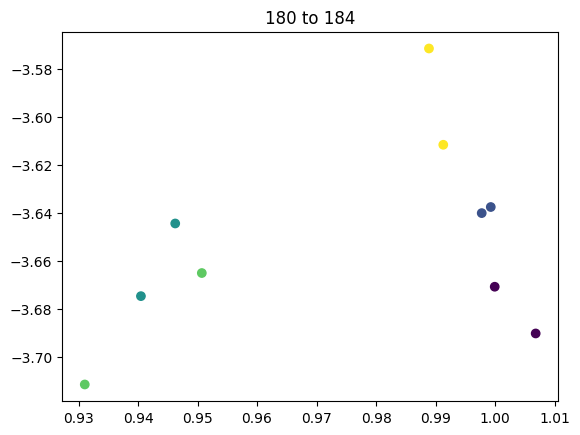

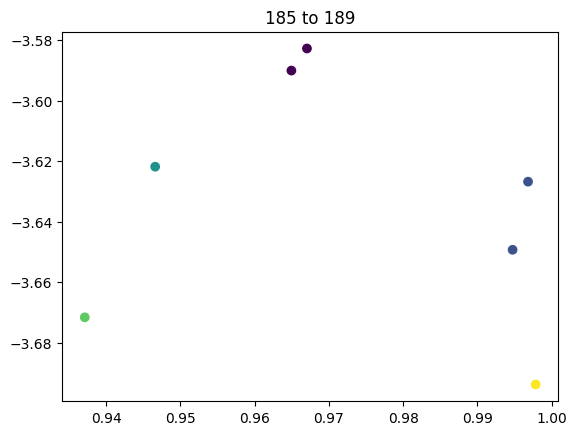

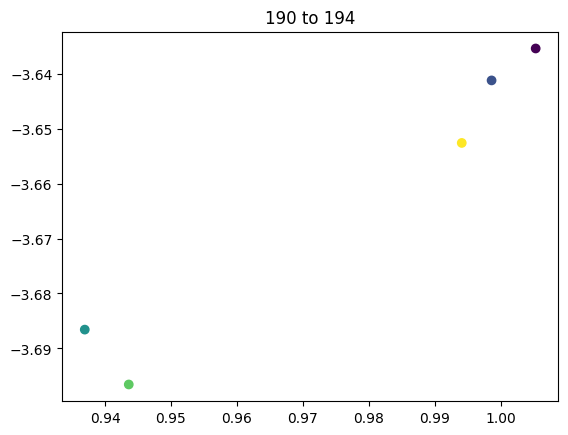

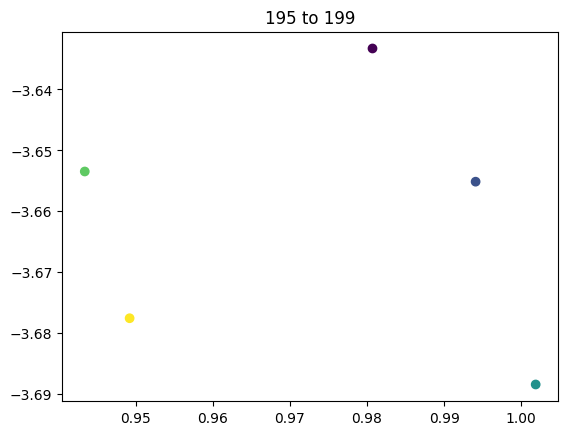

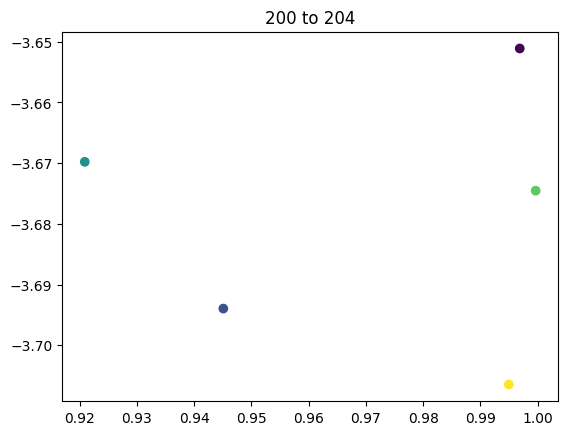

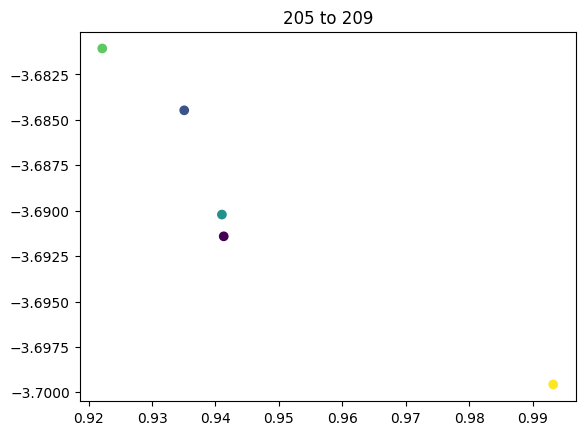

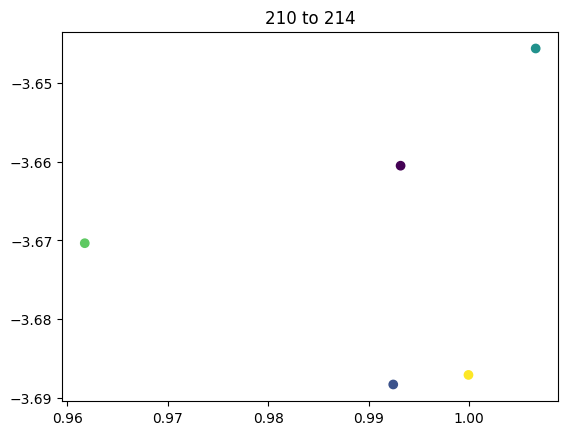

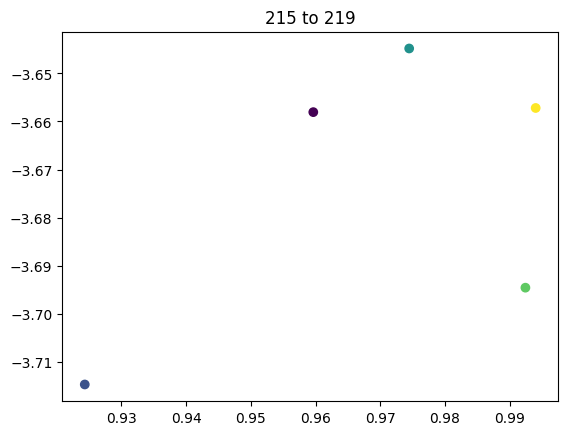

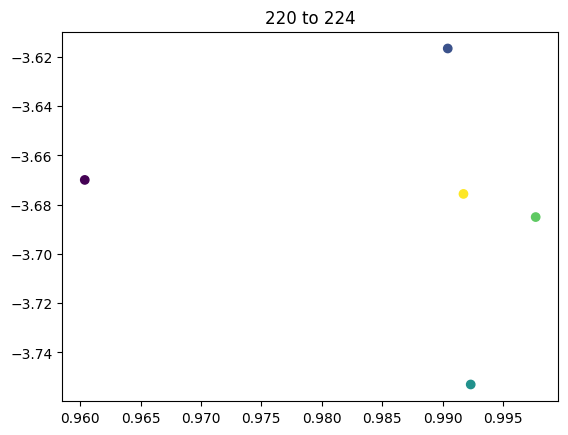

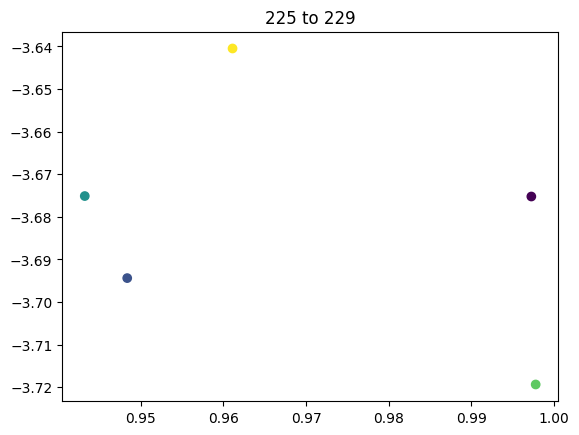

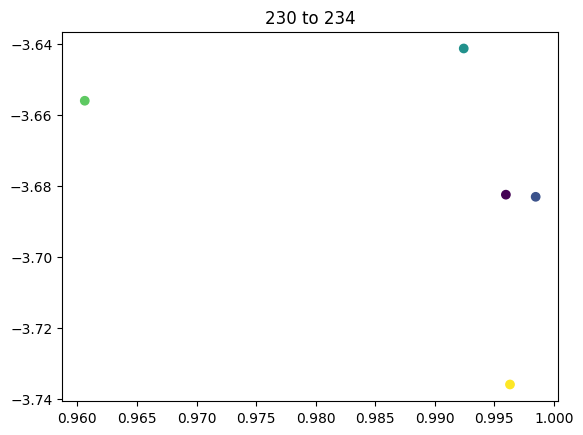

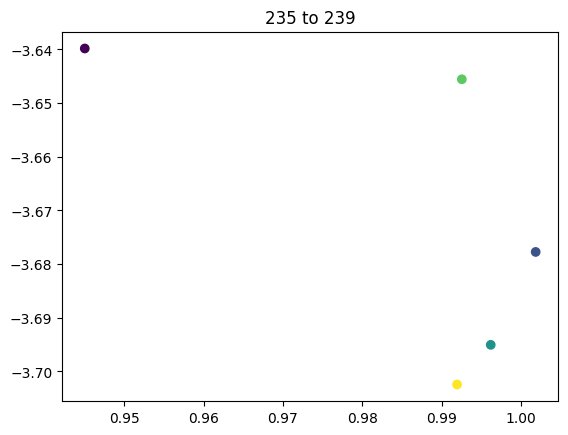

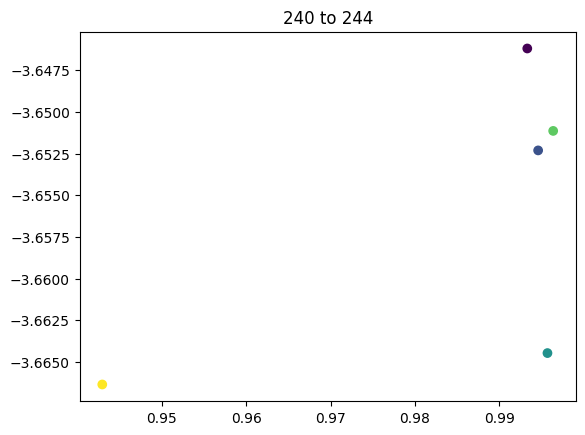

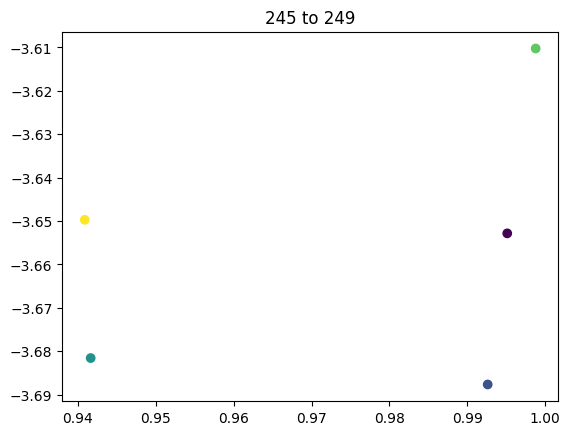

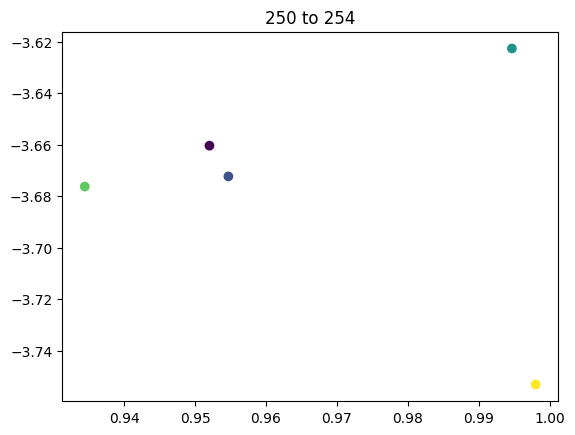

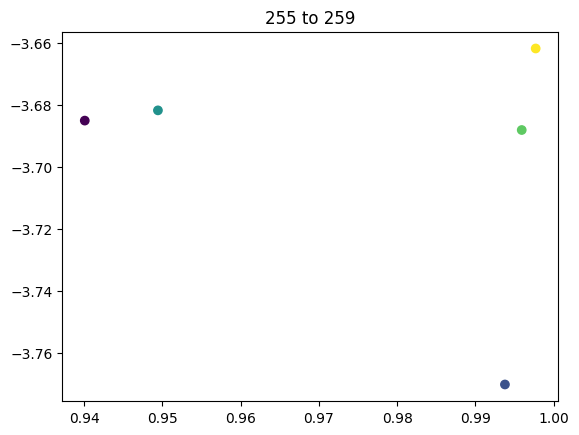

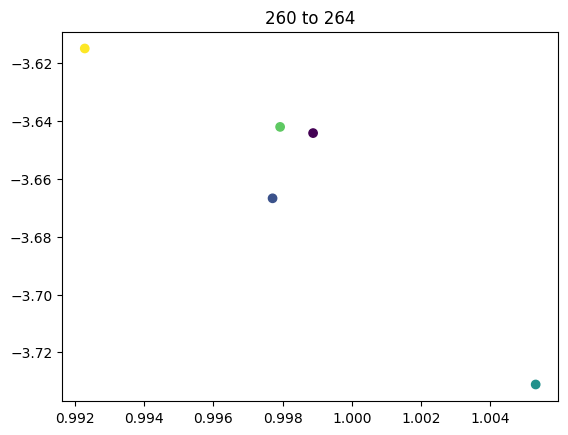

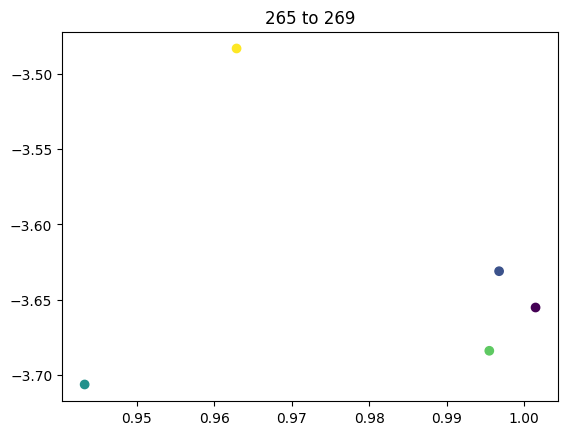

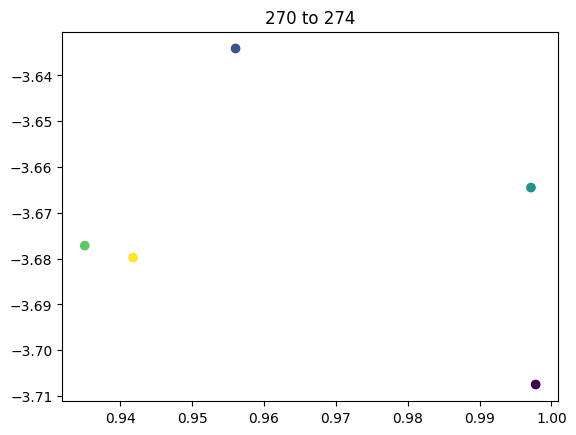

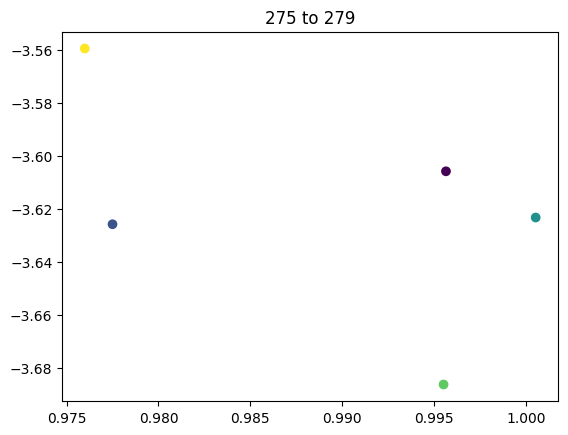

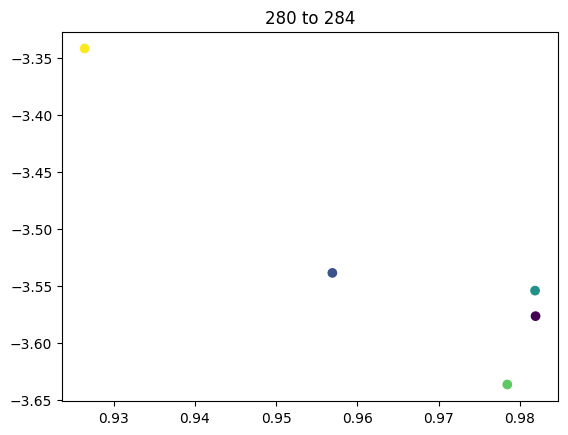

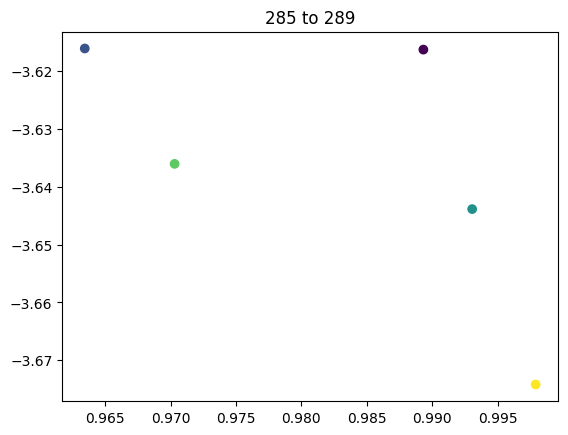

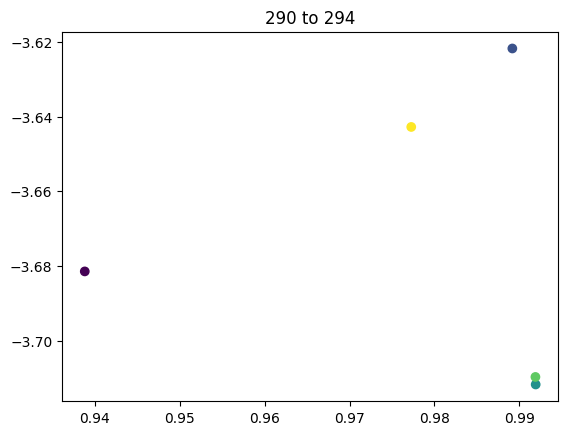

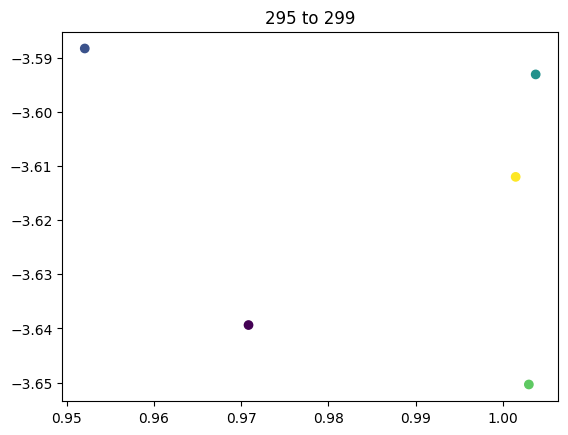

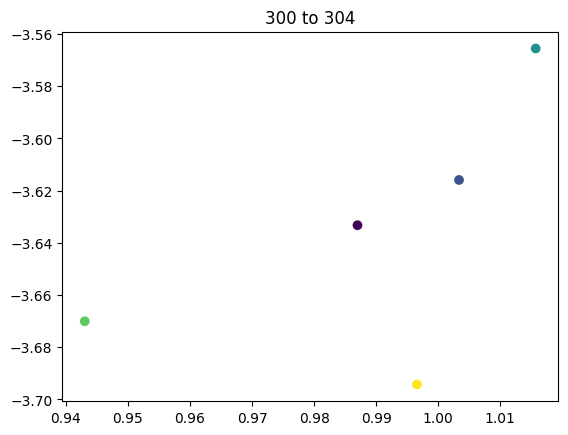

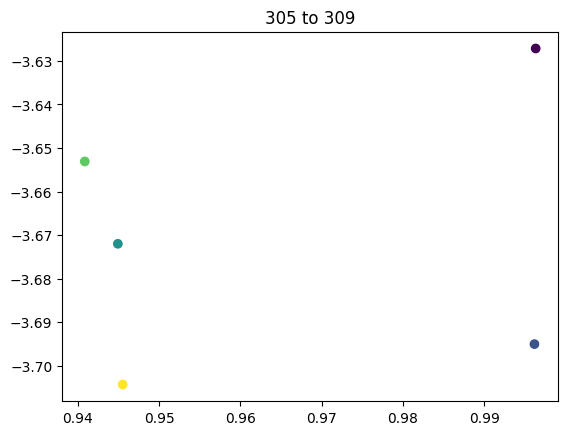

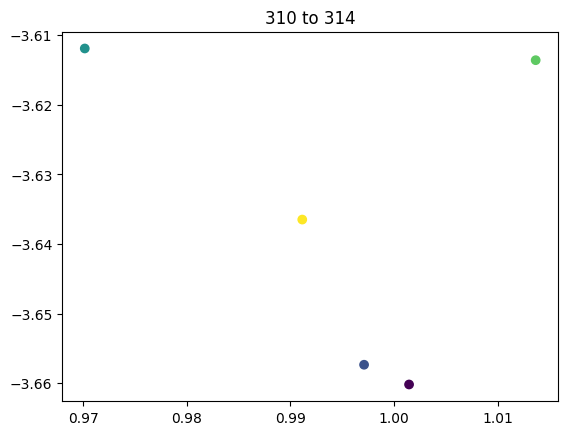

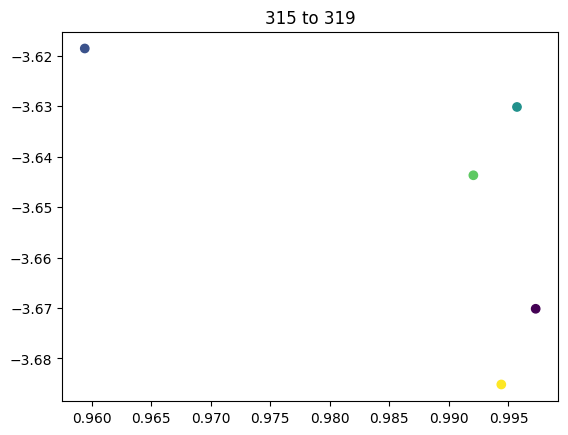

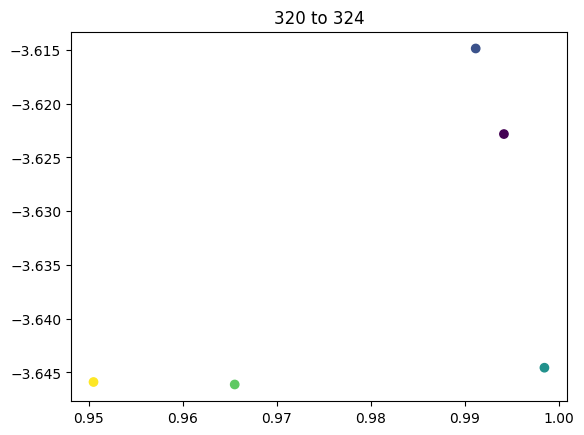

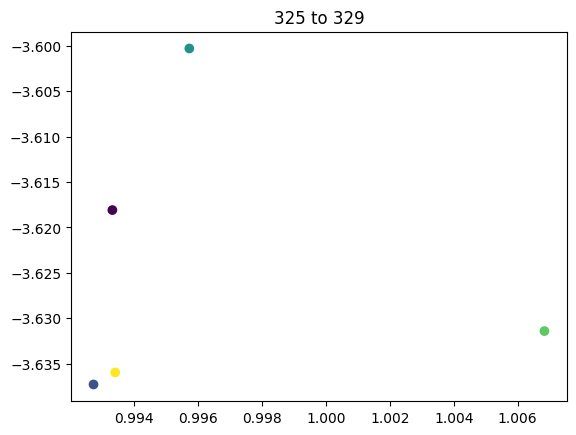

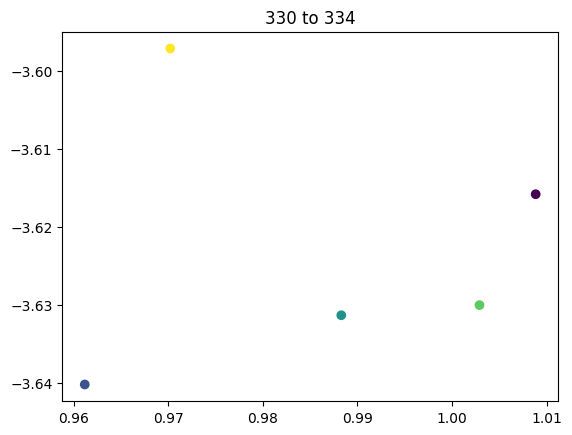

In [11]:
x = result_df["x"]
y = result_df["y"]

num_clusters = int(result_df["cluster"].max()) + 1
clusters_per_series = 5

for start in range(0, num_clusters, clusters_per_series):
    end = start + clusters_per_series
    mask = result_df["cluster"].between(start, end - 1)
    plt.figure()
    plt.scatter(result_df.loc[mask, "x"], result_df.loc[mask, "y"], c=result_df.loc[mask, "cluster"])
    plt.title(f"{start} to {end - 1}")
    
plt.close()

In [12]:
mol1 = compounds[0]
mol2 = compounds[1]

mcs = rdFMCS.FindMCS([mol1, mol2])
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

img = Draw.MolsToGridImage([mol1, mol2, mcs_mol], molsPerRow=3, subImgSize=(500, 500))


mcs = rdFMCS.FindMCS([mol1, mol2], threshold = 0.9)
mcs_mol = Chem.MolFromSmarts(mcs.smartsString)

img = Draw.MolsToGridImage([mol1, mol2, mcs_mol], molsPerRow=3, subImgSize=(500, 500))


In [ ]:
from multiprocessing import Pool
from functools import partial

def compute_mcs_pair(mol_pair, threshold):
    """Compute MCS for single pair of molecules"""
    i, j, mol_i, mol_j = mol_pair
    
    if i == j:
        return (i, j, "-")
    
    try:
        mcs_result = rdFMCS.FindMCS([mol_i, mol_j], threshold=threshold)
        if mcs_result.numAtoms > 0:
            mcs_mol = Chem.MolFromSmarts(mcs_result.smartsString)
            mcs_smiles = Chem.MolToSmiles(mcs_mol)
            return (i, j, mcs_smiles)
        else:
            return (i, j, "No MCS")
    except:
        return (i, j, "Error")

def compute_mcs_unique_pairs(compounds, threshold, n_processes):
    """Compute MCS only for unique pairs (upper triangle)"""
    n_compounds = len(compounds)
    
    # Create unique pairs only
    unique_pairs = []
    for i in range(n_compounds):
        for j in range(i+1, n_compounds):
            unique_pairs.append((i, j, compounds[i], compounds[j]))
        
    # Use multiprocessing
    with Pool(processes=n_processes) as pool:
        results = pool.map(partial(compute_mcs_pair, threshold=threshold), unique_pairs)
    
    # Create symmetric matrix
    mcs_matrix = [[None for _ in range(n_compounds)] for _ in range(n_compounds)]
    
    # Fill diagonal
    for i in range(n_compounds):
        mcs_matrix[i][i] = "-"
    
    # Fill matrix (symmetric)
    for i, j, mcs_smiles in results:
        mcs_matrix[i][j] = mcs_smiles
        mcs_matrix[j][i] = mcs_smiles
    
    return mcs_matrix

#subset_size = 50
#compounds_subset = compounds[:subset_size]

mcs_matrix = compute_mcs_unique_pairs(compounds, threshold=0.9, n_processes=32)
df = pd.DataFrame(mcs_matrix, index=range(compounds), columns=range(compounds))
df